<a href="https://colab.research.google.com/github/codeguy234/4410Homework/blob/main/Fashin_MNIST4096.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

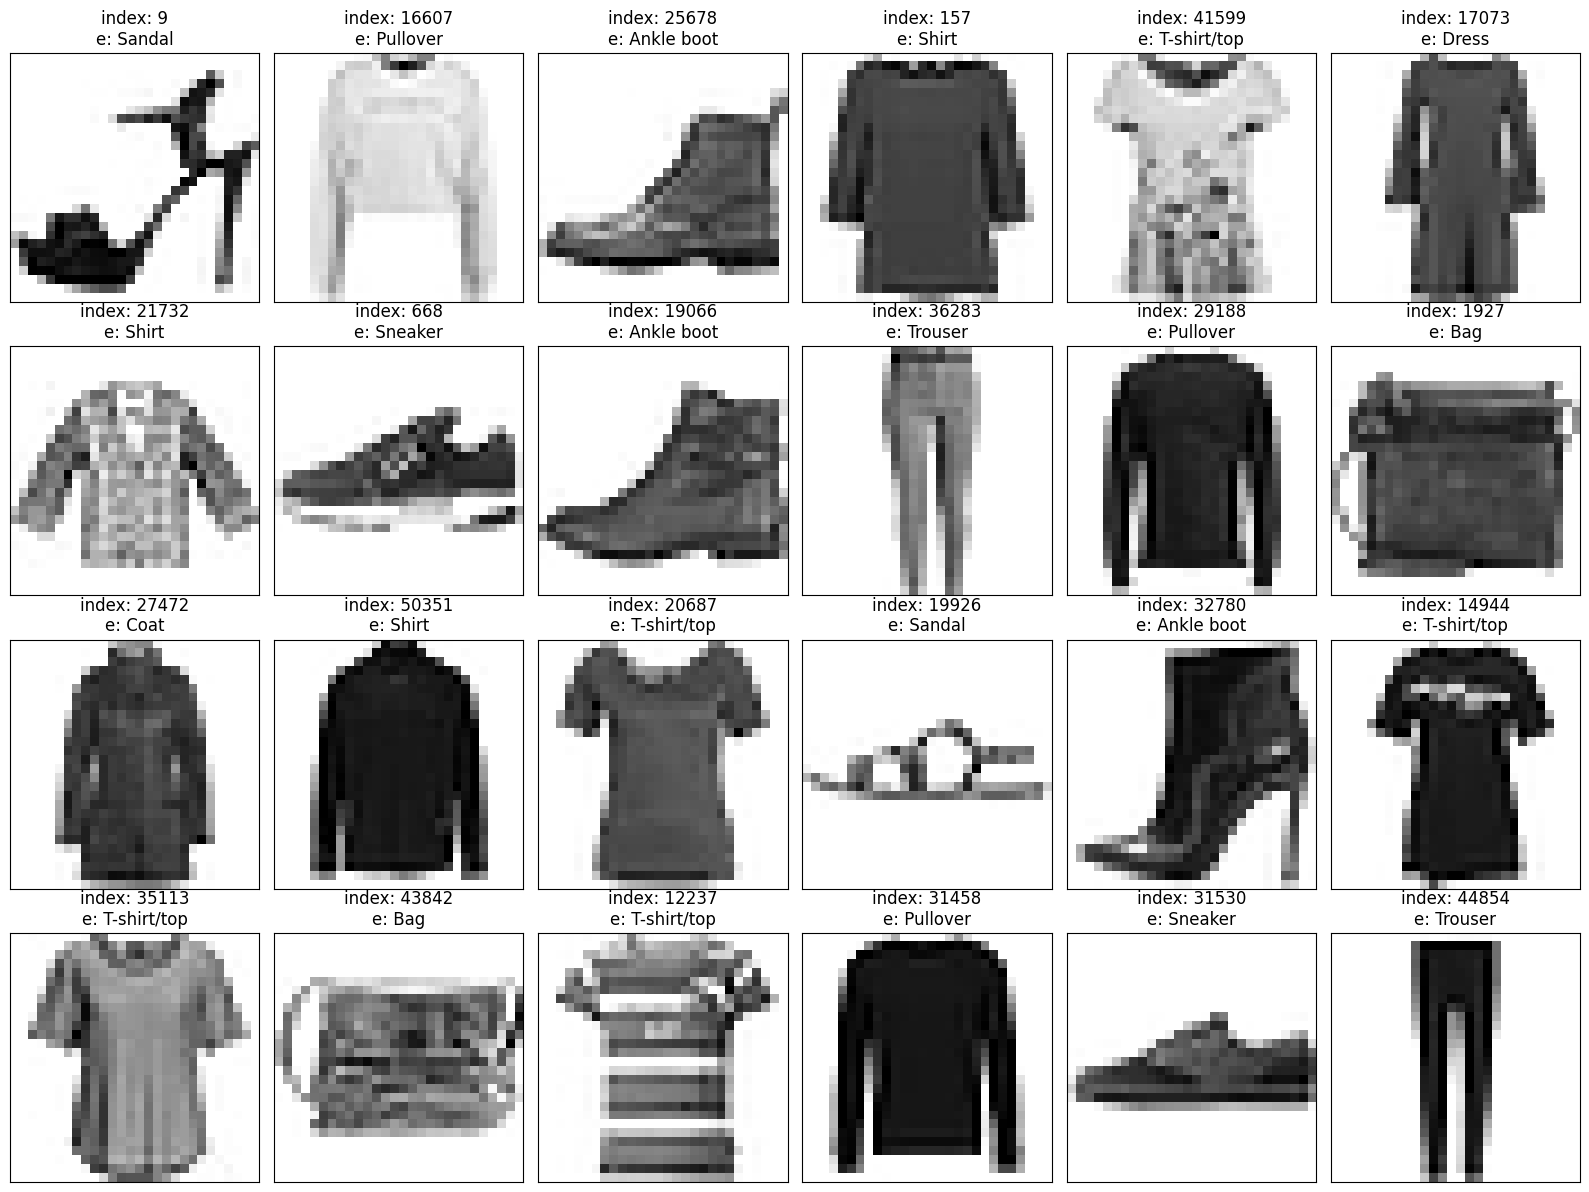

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 213s 222ms/step - accuracy: 0.7814 - loss: 0.5977
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 210s 223ms/step - accuracy: 0.8958 - loss: 0.2806
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 210s 224ms/step - accuracy: 0.9125 - loss: 0.2366
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 210s 224ms/step - accuracy: 0.9288 - loss: 0.1898
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 259s 221ms/step - accuracy: 0.9389 - loss: 0.1627
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 210s 224ms/step - accuracy: 0.9468 - loss: 0.1408
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 262s 225ms/step - accuracy: 0.9562 - loss: 0.1146
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 208s 222ms/step - accuracy: 0.9640 - loss: 0.0957
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 208s 222ms/step - accuracy: 0.9707 - loss: 0.0792
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 208s 222ms/step - accuracy: 0.9765 - loss: 0.0636
Accuracy: 0.9125000238418579


In [2]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

class_names = [
    'T-shirt/top','Trouser','Pullover','Dress','Coat',
    'Sandal','Shirt','Sneaker','Bag','Ankle boot'
]

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

indices = np.random.choice(np.arange(len(X_train)), 24, replace=False)

fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, idx, image, target in zip(axes.ravel(), indices, X_train[indices], y_train[indices]):
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(f'index: {idx}\ne: {class_names[target]}')
plt.tight_layout()
plt.show()

X_train = X_train.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
X_test  = X_test.reshape((10000, 28, 28, 1)).astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test  = to_categorical(y_test, num_classes=10)

fashion = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

fashion.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
fashion.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)
test_loss, acc_percentage = fashion.evaluate(X_test, y_test, verbose=0)
print('Accuracy:', acc_percentage)